In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=["Month"], index_col="Month")

print("First 5 rows of dataset:")
print(df.head())

First 5 rows of dataset:
            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


In [3]:
print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB
None

Summary Statistics:
       Passengers
count  144.000000
mean   280.298611
std    119.966317
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000


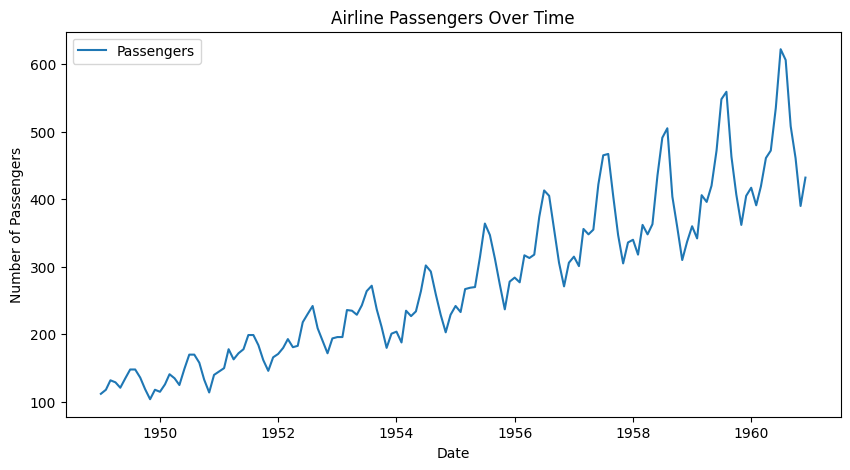

In [4]:
plt.figure(figsize=(10,5))
plt.plot(df, label="Passengers")
plt.title("Airline Passengers Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()


In [5]:
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic: ", result[0])
    print("p-value: ", result[1])
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"\t{key}: {value}")
    if result[1] <= 0.05:
        print("✅ Series is Stationary")
    else:
        print("❌ Series is Non-Stationary")

print("\nADF Test on Original Series:")
adf_test(df["Passengers"])



ADF Test on Original Series:
ADF Statistic:  0.8153688792060498
p-value:  0.991880243437641
Critical Values:
	1%: -3.4816817173418295
	5%: -2.8840418343195267
	10%: -2.578770059171598
❌ Series is Non-Stationary


In [6]:
df_diff = df["Passengers"].diff().dropna()

print("\nADF Test after Differencing (d=1):")
adf_test(df_diff)

# Step 8: If still non-stationary, you can apply second differencing
# (here usually d=1 is enough for this dataset)

# Step 9: Split dataset into train and test
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

print(f"\nTrain size: {len(train)}, Test size: {len(test)}")


ADF Test after Differencing (d=1):
ADF Statistic:  -2.8292668241700047
p-value:  0.05421329028382478
Critical Values:
	1%: -3.4816817173418295
	5%: -2.8840418343195267
	10%: -2.578770059171598
❌ Series is Non-Stationary

Train size: 115, Test size: 29


In [7]:
model = ARIMA(train, order=(2,1,2))
model_fit = model.fit()

print(model_fit.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  115
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -523.758
Date:                Thu, 18 Sep 2025   AIC                           1057.516
Time:                        03:10:57   BIC                           1071.197
Sample:                    01-01-1949   HQIC                          1063.069
                         - 07-01-1958                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3280      0.145      2.268      0.023       0.045       0.611
ar.L2          0.2521      0.165      1.528      0.126      -0.071       0.575
ma.L1         -0.0125      0.109     -0.114      0.9

In [8]:
forecast = model_fit.forecast(steps=len(test))
forecast = pd.Series(forecast, index=test.index)


In [9]:
mse = mean_squared_error(test, forecast)
mae = mean_absolute_error(test, forecast)
rmse = math.sqrt(mse)

print("\nEvaluation Metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")


Evaluation Metrics:
MSE: 6808.397034418323
MAE: 63.54531127532635
RMSE: 82.51301130378361


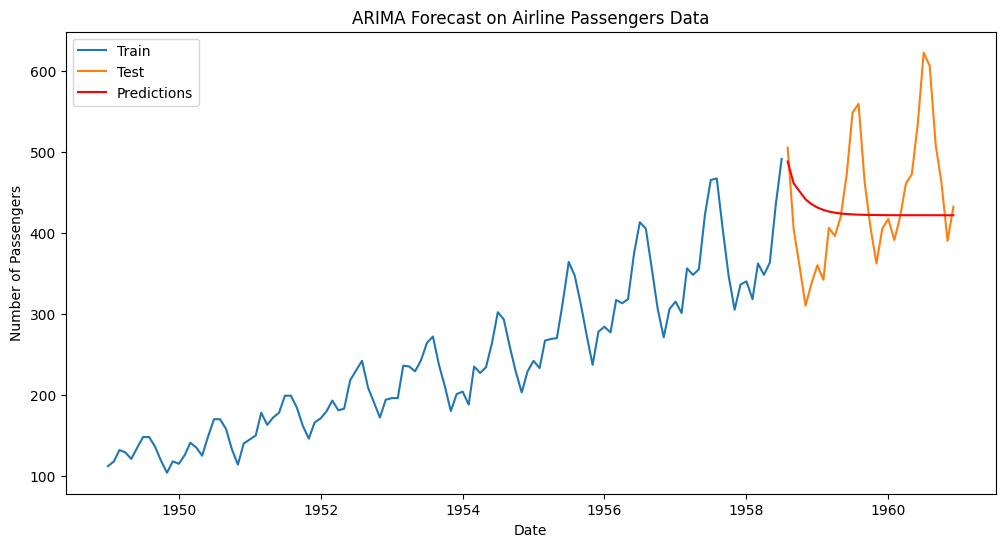

In [10]:
plt.figure(figsize=(12,6))
plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.plot(forecast, label="Predictions", color="red")
plt.title("ARIMA Forecast on Airline Passengers Data")
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()
